In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# dataset

In [2]:
# path_dataset = './assets/generate_faces'
path_dataset = './assets/preprocess'

In [3]:
!ls $path_dataset

'face_(128, 128)_0000.jpg'  'face_(128, 128)_1014.jpg'
'face_(128, 128)_0001.jpg'  'face_(128, 128)_1015.jpg'
'face_(128, 128)_0002.jpg'  'face_(128, 128)_1016.jpg'
'face_(128, 128)_0003.jpg'  'face_(128, 128)_1017.jpg'
'face_(128, 128)_0004.jpg'  'face_(128, 128)_1018.jpg'
'face_(128, 128)_0005.jpg'  'face_(128, 128)_1019.jpg'
'face_(128, 128)_0006.jpg'  'face_(128, 128)_1020.jpg'
'face_(128, 128)_0007.jpg'  'face_(128, 128)_1021.jpg'
'face_(128, 128)_0008.jpg'  'face_(128, 128)_1022.jpg'
'face_(128, 128)_0009.jpg'  'face_(128, 128)_1023.jpg'
'face_(128, 128)_0010.jpg'  'face_(128, 128)_1024.jpg'
'face_(128, 128)_0011.jpg'  'face_(128, 128)_1025.jpg'
'face_(128, 128)_0012.jpg'  'face_(128, 128)_1026.jpg'
'face_(128, 128)_0013.jpg'  'face_(128, 128)_1027.jpg'
'face_(128, 128)_0014.jpg'  'face_(128, 128)_1028.jpg'
'face_(128, 128)_0015.jpg'  'face_(128, 128)_1029.jpg'
'face_(128, 128)_0016.jpg'  'face_(128, 128)_1030.jpg'
'face_(128, 128)_0017.jpg'  'face_(128, 128)_1031.jpg'
'face_(128

In [4]:
from glob import glob

In [5]:
images = glob(path_dataset+'/*.jpg')
n = len(images)
print(n)

2027


# analysis data images

In [6]:
img_size = []
for i in range(n):
    orig_img_path = images[i]
    img = cv2.imread(orig_img_path)
    img_size.append(img.shape)
img_size = np.array(img_size)

In [7]:
img.shape[:-1]

(128, 128)

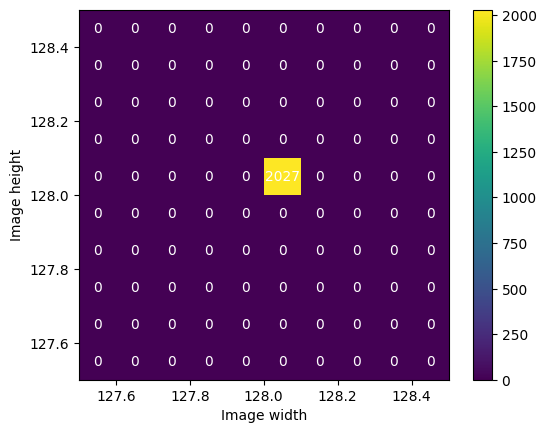

In [8]:
# Compute the histogram values
hist, xedges, yedges = np.histogram2d(img_size[:,0], img_size[:,1], bins=10)

# Create the heatmap
plt.imshow(hist.T, cmap='viridis', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add number labels to each cell
for i in range(hist.shape[0]):
    for j in range(hist.shape[1]):
        plt.text(xedges[i]+(xedges[1]-xedges[0])/2, yedges[j]+(yedges[1]-yedges[0])/2, int(hist[i,j]),
                 ha='center', va='center', color='white', fontsize=10)

# Add colorbar and axis labels
plt.colorbar()
plt.xlabel('Image width')
plt.ylabel('Image height')
plt.show()

In [9]:
import pandas as pd

In [10]:
# df = pd.DataFrame(images, columns=['image_path'])
# df.to_csv(path_dataset + '/info.csv', index=False)

In [11]:
# df = pd.read_csv(path_dataset+'/info_age_gender - info.csv')
# df.head()

,image_path,gender,age
0,"./assets/preprocess/face_(128, 128)_0000.jpg",NaN,NaN
1,"./assets/preprocess/face_(128, 128)_0001.jpg",M,(20-40)
2,"./assets/preprocess/face_(128, 128)_0002.jpg",M,(20-40)
3,"./assets/preprocess/face_(128, 128)_0003.jpg",M,(40-100)
4,"./assets/preprocess/face_(128, 128)_0004.jpg",NaN,NaN


In [12]:
# print(df.shape)

(2027, 3)


In [13]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2027 non-null   object
 1   gender      294 non-null    object
 2   age         294 non-null    object
dtypes: object(3)
memory usage: 47.6+ KB


In [14]:
# print(df.isna().sum())


image_path       0
gender        1733
age           1733
dtype: int64


In [15]:
# df['age'].value_counts()

(20-40)     161
(40-100)    133
Name: age, dtype: int64

In [16]:
# df['gender'].value_counts()

M    238
F     56
Name: gender, dtype: int64

In [17]:
# import pathlib
# pathlib.Path("./assets/datasets/gender/M").mkdir(parents=True, exist_ok=True)
# pathlib.Path("./assets/datasets/gender/F").mkdir(parents=True, exist_ok=True)
# pathlib.Path("./assets/datasets/age/(0-20)").mkdir(parents=True, exist_ok=True)
# pathlib.Path("./assets/datasets/age/(20-40)").mkdir(parents=True, exist_ok=True)
# pathlib.Path("./assets/datasets/age/(40-100)").mkdir(parents=True, exist_ok=True)
# pathlib.Path("./assets/datasets/null").mkdir(parents=True, exist_ok=True)

In [18]:
# null_df = df[df.isnull().any(axis=1)]
# not_null_df = df[~df.isnull().any(axis=1)]

In [19]:
# null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1733 entries, 0 to 2026
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1733 non-null   object
 1   gender      0 non-null      object
 2   age         0 non-null      object
dtypes: object(3)
memory usage: 54.2+ KB


In [20]:
# not_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 1 to 2025
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  294 non-null    object
 1   gender      294 non-null    object
 2   age         294 non-null    object
dtypes: object(3)
memory usage: 9.2+ KB


In [21]:
# for (image_path, gender, age) in null_df.values:
#     img_name = image_path.split('/')[-1]
#     img = cv2.imread(image_path)
#     null_path = f'./assets/datasets/null/{img_name}'
#     cv2.imwrite(null_path, img)

In [22]:
# for (image_path, gender, age) in df.values:
#     img_name = image_path.split('/')[-1]

#     img = cv2.imread(image_path)
#     gender_path = f'./assets/datasets/gender/{gender}/{img_name}'
#     age_path = f'./assets/datasets/age/{age}/{img_name}'
#     cv2.imwrite(gender_path, img)
#     cv2.imwrite(age_path, img)

In [138]:
path_M = './assets/datasets/gender/M'
path_F = './assets/datasets/gender/F'

path_age1 = './assets/datasets/age/(0-20)'
path_age2 = './assets/datasets/age/(20-40)'
path_age3 = './assets/datasets/age/(40-100)'


In [139]:
# !ls $path_M

In [140]:
print(path_M)
M_images = glob(path_M+'/*.jpg')
print(len(M_images))
print('=======================')
print(path_F)
F_images = glob(path_F+'/*.jpg')
print(len(F_images))
print('=======================')
print(path_age1)
age1_images = glob(path_age1+'/*.jpg')
print(len(age1_images))
print('=======================')
print(path_age2)
age2_images = glob(path_age2+'/*.jpg')
print(len(age2_images))
print('=======================')
print(path_age3)
age3 = glob(path_age3+'/*.jpg')
print(len(age3))
print('=======================')


./assets/datasets/gender/M
2500
./assets/datasets/gender/F
2500
./assets/datasets/age/(0-20)
163
./assets/datasets/age/(20-40)
691
./assets/datasets/age/(40-100)
245


In [141]:
data_bonus = './assets/data_bonus/data_add1'
!ls $data_bonus

Training  Validation


In [142]:
path_train_M = data_bonus + '/Training/male'
path_train_F = data_bonus + '/Training/female'

path_val_M = data_bonus + '/Validation/male'
path_val_F = data_bonus + '/Validation/female'


In [143]:
print(path_train_M)
M_train_images = glob(path_train_M+'/*.jpg')
print(len(M_train_images))
print('=======================')
print(path_train_F)
F_train_images = glob(path_train_F+'/*.jpg')
print(len(F_train_images))
print('=======================')
print(path_val_M)
M_val_images = glob(path_val_M+'/*.jpg')
print(len(M_val_images))
print('=======================')
print(path_val_F)
F_val_images = glob(path_val_F+'/*.jpg')
print(len(F_val_images))
print('=======================')


./assets/data_bonus/data_add1/Training/male
23766
./assets/data_bonus/data_add1/Training/female
23243
./assets/data_bonus/data_add1/Validation/male
5808
./assets/data_bonus/data_add1/Validation/female
5841


In [144]:
N_images = 2500
M_rem = N_images - len(M_images)
M_rem_images = np.random.choice(M_train_images, M_rem, replace=False)
print(M_rem)

0


In [145]:
# M_rem_images

In [146]:
def write_bonus(rem_images, size = (128, 128), root = './assets/datasets/gender/M_bonus/'):
    for im_path in rem_images:
        im = cv2.imread(im_path)
        im_res = cv2.resize(im, size)
        im_name = im_path.split('/')[-1]
        p1 = root +im_name
        cv2.imwrite(p1, im_res)

In [147]:
write_bonus(M_rem_images, root = './assets/datasets/gender/M_bonus/')

In [148]:
print(len(glob( './assets/datasets/gender/M_bonus/*.jpg')))

0


In [149]:
N_images = 2500
F_rem = N_images - len(F_images)
F_rem_images = np.random.choice(F_train_images, F_rem, replace=False)
print(F_rem)

write_bonus(F_rem_images, root = './assets/datasets/gender/F_bonus/')

0


In [150]:
print(len(glob( './assets/datasets/gender/F_bonus/*.jpg')))

0
